# Context:
The data set has information about features of silhouette extracted from the images of different cars
Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 
cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars 
would be readily distinguishable, but it would be more difficult to distinguish between the cars.

Here let's apply both Hierarchial and K-Means Clustering.

# Import the necessary libraries and load the dataset.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df=pd.read_csv("vehicle.csv")
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [13]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


# Q1. Check for missing values in the dataset.

In [20]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

# Q2. Drop the missing values.
### Note: [Use the dataset thus created after dropping missing values for the clustering algorithms.]

In [24]:
df_new=df.dropna()
df_new.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

# Q3. Check the shape (rows and columns), info and the basic measures of descriptive statistics from the data.

In [26]:
df_new.shape

(813, 19)

# Q4. Print/Plot the dependent (categorical variable) and Check for any missing values in the data

In [27]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  813 non-null    int64  
 1   circularity                  813 non-null    float64
 2   distance_circularity         813 non-null    float64
 3   radius_ratio                 813 non-null    float64
 4   pr.axis_aspect_ratio         813 non-null    float64
 5   max.length_aspect_ratio      813 non-null    int64  
 6   scatter_ratio                813 non-null    float64
 7   elongatedness                813 non-null    float64
 8   pr.axis_rectangularity       813 non-null    float64
 9   max.length_rectangularity    813 non-null    int64  
 10  scaled_variance              813 non-null    float64
 11  scaled_variance.1            813 non-null    float64
 12  scaled_radius_of_gyration    813 non-null    float64
 13  scaled_radius_of_gyr

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

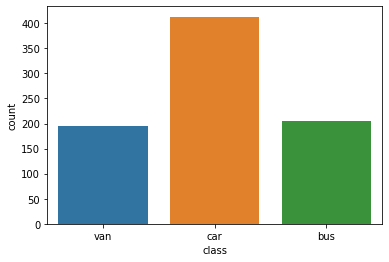

In [33]:
sns.countplot(df_new["class"])

<AxesSubplot:ylabel='class'>

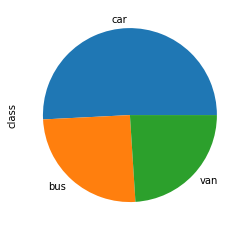

In [45]:
pd.value_counts(df_new["class"]).plot(kind="pie")

([<matplotlib.patches.Wedge at 0x1e94e85ab20>,
 [Text(-0.027626070146248915, 1.0996530363020305, 'car'),
  Text(-0.7322452066390746, -0.8208635436868295, 'bus'),
  Text(0.8022145734200009, -0.7526299078515057, 'van')])

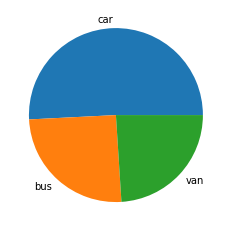

In [53]:
plt.pie(df_new["class"].value_counts(), labels=df["class"].value_counts().index)

# Q4. Standardize the data.

Drop the categorical variable before clustering the data.

In [58]:
df_new2=df_new.drop("class",axis=1)
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  813 non-null    int64  
 1   circularity                  813 non-null    float64
 2   distance_circularity         813 non-null    float64
 3   radius_ratio                 813 non-null    float64
 4   pr.axis_aspect_ratio         813 non-null    float64
 5   max.length_aspect_ratio      813 non-null    int64  
 6   scatter_ratio                813 non-null    float64
 7   elongatedness                813 non-null    float64
 8   pr.axis_rectangularity       813 non-null    float64
 9   max.length_rectangularity    813 non-null    int64  
 10  scaled_variance              813 non-null    float64
 11  scaled_variance.1            813 non-null    float64
 12  scaled_radius_of_gyration    813 non-null    float64
 13  scaled_radius_of_gyr

In [60]:
from sklearn.preprocessing import StandardScaler

In [65]:
x=StandardScaler()
scaled_data=x.fit_transform(df_new2)
scaled_data

array([[ 0.16323063,  0.52040788,  0.06066872, ...,  0.37128716,
        -0.3218087 ,  0.17183708],
       [-0.32287376, -0.61912319,  0.12406675, ...,  0.14710858,
         0.00340009,  0.44231829],
       [ 1.2569655 ,  0.84598818,  1.51882349, ..., -0.41333788,
        -0.1592043 ,  0.03659647],
       ...,
       [ 1.5000177 ,  1.49714879,  1.20183332, ..., -0.97378433,
        -0.3218087 ,  0.7127995 ],
       [-0.93050425, -1.43307395, -0.25632145, ...,  1.38009078,
         0.16600449, -0.09864413],
       [-1.05203035, -1.43307395, -1.01709784, ...,  0.59546574,
        -0.4844131 , -0.77484716]])

In [68]:
scaled_df=pd.DataFrame(scaled_data)
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,813.0,-2.425284e-16,1.000616,-2.510344,-0.808978,-0.079822,0.770861,3.079857
1,813.0,-4.642999e-16,1.000616,-1.921444,-0.781913,-0.130753,0.683198,2.311100
2,813.0,-2.351542e-16,1.000616,-2.665447,-0.763506,-0.192923,1.011639,1.899212
3,813.0,3.665238e-16,1.000616,-1.937757,-0.836393,-0.062462,0.771002,4.878790
4,813.0,-2.047016e-16,1.000616,-1.854258,-0.599253,-0.097251,0.404751,9.566288
5,813.0,-1.349201e-16,1.000616,-1.411767,-0.342087,-0.128151,0.299721,9.926837
6,813.0,3.714399e-16,1.000616,-1.710835,-0.682459,-0.349749,0.890352,2.916857
7,813.0,-2.062038e-16,1.000616,-1.922008,-1.024408,0.257876,0.642562,2.565989
8,813.0,-2.651972e-16,1.000616,-1.383740,-0.606014,-0.217151,0.949438,3.282615
9,813.0,-7.398756e-16,1.000616,-2.062109,-0.751377,-0.130505,0.766312,2.766901


# Q5. Perform Hierarchical Clustering with the Ward's linkage method and plot the dendrogram.
#### Note: Please do go ahead and explore other parameters under the linkage function in the Scientific Python library. 

In [71]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [76]:
myclust=linkage(scaled_df,method='ward')
myclust

array([[1.27000000e+02, 3.70000000e+02, 1.31740844e-01, 2.00000000e+00],
       [4.78000000e+02, 7.52000000e+02, 3.94147914e-01, 2.00000000e+00],
       [4.48000000e+02, 5.25000000e+02, 5.40896298e-01, 2.00000000e+00],
       ...,
       [1.60100000e+03, 1.62100000e+03, 5.12738877e+01, 2.82000000e+02],
       [1.61700000e+03, 1.62000000e+03, 5.35328071e+01, 5.31000000e+02],
       [1.62200000e+03, 1.62300000e+03, 1.07910132e+02, 8.13000000e+02]])

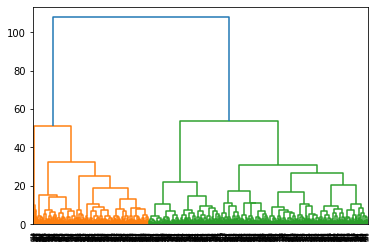

In [78]:
dendrogram_set= dendrogram(myclust)

In [ ]:
dendrogram_set

# Q6. Plot the truncated dendrogram with the last 25 clusters.

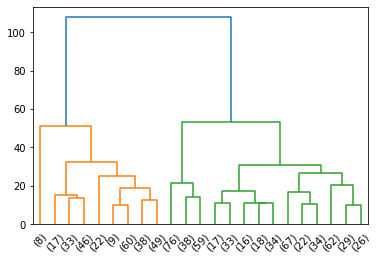

In [83]:
dend=dendrogram(myclust,
               truncate_mode='lastp',
               p=23,)

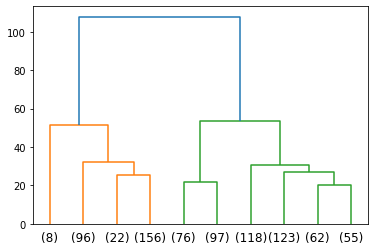

In [86]:
dend=dendrogram(myclust,
               truncate_mode='lastp',
               p=10,)

# Q7. Identify the number of clusters based on the dendrogram and add the cluster numbers to the original dataframe.

In [89]:
from scipy.cluster.hierarchy import fcluster

In [91]:
#Method 1

clusters_1 = fcluster(myclust, 2, criterion='maxclust')
clusters_1

array([2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1,
       2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2,

In [93]:
#Method 1
clusters_1 = fcluster(myclust, 60, criterion='distance')
clusters_1

array([2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1,
       2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2,

In [96]:
df_new["clusters"]=clusters_1

<ipython-input-96-90a190a38a9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["clusters"]=clusters_1


In [98]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  813 non-null    int64  
 1   circularity                  813 non-null    float64
 2   distance_circularity         813 non-null    float64
 3   radius_ratio                 813 non-null    float64
 4   pr.axis_aspect_ratio         813 non-null    float64
 5   max.length_aspect_ratio      813 non-null    int64  
 6   scatter_ratio                813 non-null    float64
 7   elongatedness                813 non-null    float64
 8   pr.axis_rectangularity       813 non-null    float64
 9   max.length_rectangularity    813 non-null    int64  
 10  scaled_variance              813 non-null    float64
 11  scaled_variance.1            813 non-null    float64
 12  scaled_radius_of_gyration    813 non-null    float64
 13  scaled_radius_of_gyr

In [103]:
df_new.value_counts("clusters")

clusters
2    531
1    282
dtype: int64

# Q8. Export the dataframe thus created with the clusters into a csv file.

In [104]:
df_new.to_csv('H_Cluster.csv')

# Q9. Perform the K-Means clustering with 2 clusters.

In [105]:
from sklearn.cluster import KMeans 

In [109]:
k_means2 = KMeans(n_clusters = 2,random_state=1)
k_means2.fit(scaled_df)
k_means2.labels_

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,

# Q10. Find out the within cluster sum of squares for 2 clusters for the K-Means algorithm.

In [107]:
k_means2.inertia_

8623.136975986425

# Q11. Perform the K-Means clustering with 3 clusters and find out the within cluster sum of squares.

In [111]:
k_means2 = KMeans(n_clusters = 3,random_state=1)
k_means2.fit(scaled_df)
k_means2.labels_
k_means2.inertia_

7037.46739461807

# Q13. Find the Within Sum of Squares (WSS) for 2 to 15 clusters.

In [114]:
wss=[]
for ind in range(2,16):
    k_means2 = KMeans(n_clusters = ind,random_state=1)
    k_means2.fit(scaled_df)
    wss.append(k_means2.inertia_)

    
wss

[8623.136975986425,
 7037.46739461807,
 5740.134849081905,
 5188.91134051708,
 4706.483762133268,
 4355.139333861277,
 4129.750243444239,
 3846.9962071725504,
 3652.3286527657747,
 3465.589197842322,
 3334.9003316834232,
 3224.526749674522,
 3103.088539166074,
 3035.3204908636594]

# Q14. Plot the Within Sum of Squares (WSS) plot using the values of 'inertia' computed in the last question.

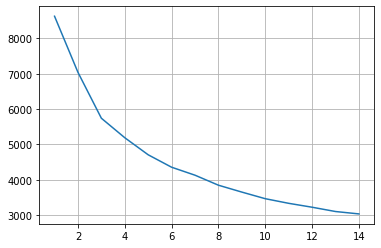

In [118]:
plt.plot(range(1,15), wss)
plt.grid()
plt.show()

# Q15. Find the optimum number of clusters from the WSS plot in the previous question.

# Q16. Check the average silhouette score and silhouette width of the cluster(s) thus created.

# Q17. Add the cluster labels to the dataset which has the cluster labels of Hierarchical Clustering.

# Q18. Export the new dataframe with both the cluster labels of Hierarchical Clustering and K-Means clustering into a csv. Do not include the 'class' variable in this particular dataframe. 